In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import Eq, symbols, Function, init_printing, dsolve, solve, expand
from sympy.utilities.lambdify import lambdify
from scipy.integrate import odeint

init_printing()

%matplotlib inline

# Моделювання вільного і обмеженого росту популяцій

## Task 1 Моделювання вільного росту популяції

In [2]:
t_0 = 17
N_0 = 79
r = 0.66
k = 93

### Диференціальне рівняння

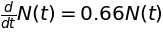

In [3]:
t, C1= symbols("t C1")
N = Function('N')
eq = Eq(N(t).diff(t), r*N(t))
eq

### Аналітичний розв'язок

In [4]:
res = dsolve(eq)
constant = solve((res.subs(t,t_0).subs(N(t_0),N_0),),{C1})
N_t = expand(res.subs(constant))
N_t

### Чисельний розв'язок

In [5]:
def equation(N, t, r):
    dNdt = r*N
    return dNdt

In [6]:
time = np.linspace(t_0, 20, 301)
N_numerical = odeint(equation, N_0, time, args=(r,))
N_numerical = N_numerical[:,0]
d = {'N(t)': {}}
for i in range(0, time.shape[0], 25):
    d['N(t)']['t = '+str(time[i])] = N_numerical[i].round(2)
pd.DataFrame.from_dict(d, orient='index')

,t = 17.0,t = 17.25,t = 17.5,t = 17.75,t = 18.0,t = 18.25,t = 18.5,t = 18.75,t = 19.0,t = 19.25,t = 19.5,t = 19.75,t = 20.0
N(t),79.0,93.17,109.89,129.6,152.85,180.27,212.61,250.75,295.73,348.78,411.35,485.15,572.18


### Графік аналітичного розв'язку

In [7]:
N_analytical = lambdify(t, N_t.rhs)

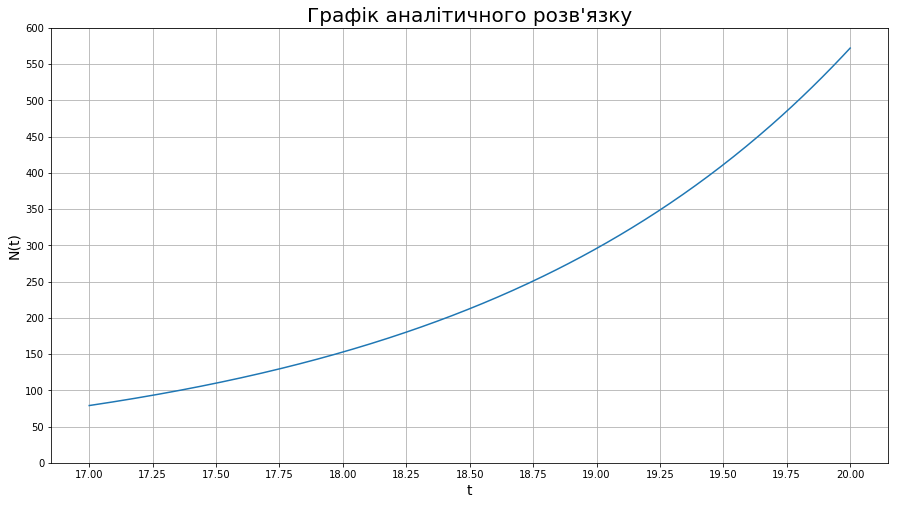

In [8]:
plt.figure(figsize=(15,8))
plt.title("Графік аналітичного розв\'язку", fontsize=20)
plt.plot(time, N_analytical(time))
plt.grid()
plt.xticks(np.arange(t_0, 20.25, 0.25))
plt.yticks(np.arange(0, 650, 50))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.show()

### Графік чисельного розв'язку

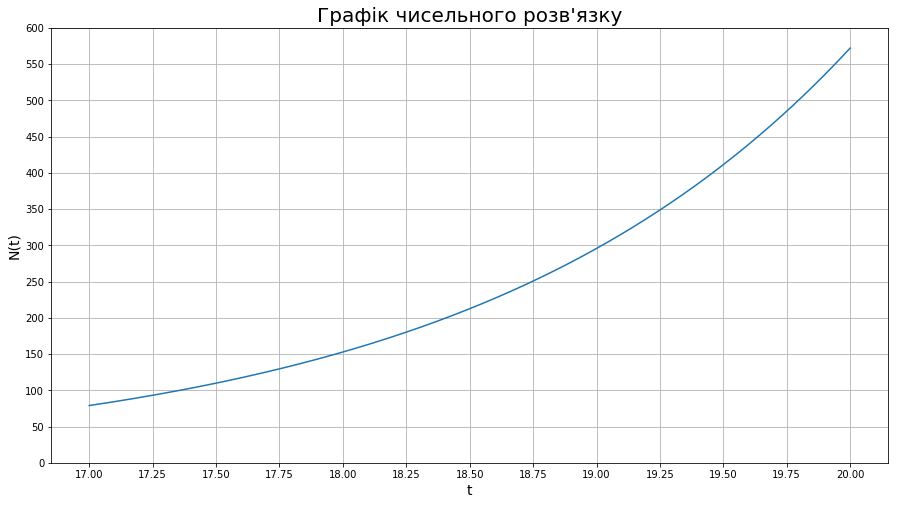

In [9]:
plt.figure(figsize=(15,8))
plt.title("Графік чисельного розв\'язку", fontsize=20)
plt.plot(time, N_numerical)
plt.grid()
plt.xticks(np.arange(t_0, 20.25, 0.25))
plt.yticks(np.arange(0, 650, 50))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.show()

## Task 2 Моделювання обмеженого росту популяції

### Диференціальне рівняння

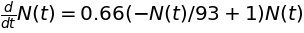

In [10]:
t, C1= symbols("t C1")
N = Function('N')
eq = Eq(N(t).diff(t), r*N(t)*(1 - N(t)/k))
eq

### Аналітичний розв'язок

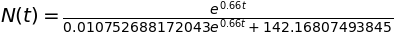

In [11]:
res = dsolve(eq, hint='Bernoulli')
constant = solve((res.subs(t,t_0).subs(N(t_0),N_0),),{C1})
N_t = expand(res.subs(constant))
N_t

### Чисельний розв'язок

In [12]:
def equation(N, t, r, k):
    dNdt = r*N*(1-N/k)
    return dNdt

In [13]:
time = np.linspace(t_0, 23, 601)
N_numerical = odeint(equation, N_0, time, args=(r,k))
N_numerical = N_numerical[:,0]
d = {'N(t)': {}}
for i in range(0, time.shape[0], 40):
    d['N(t)']['t = '+str(time[i])] = N_numerical[i].round(2)
pd.DataFrame.from_dict(d, orient='index')

,t = 17.0,t = 17.4,t = 17.8,t = 18.2,t = 18.6,t = 19.0,t = 19.4,t = 19.8,t = 20.2,t = 20.6,t = 21.0,t = 21.4,t = 21.8,t = 22.2,t = 22.6,t = 23.0
N(t),79.0,81.86,84.2,86.09,87.6,88.8,89.74,90.47,91.05,91.49,91.84,92.11,92.31,92.47,92.59,92.69


### Графік аналітичного розв'язку

In [14]:
N_analytical = lambdify(t, N_t.rhs)

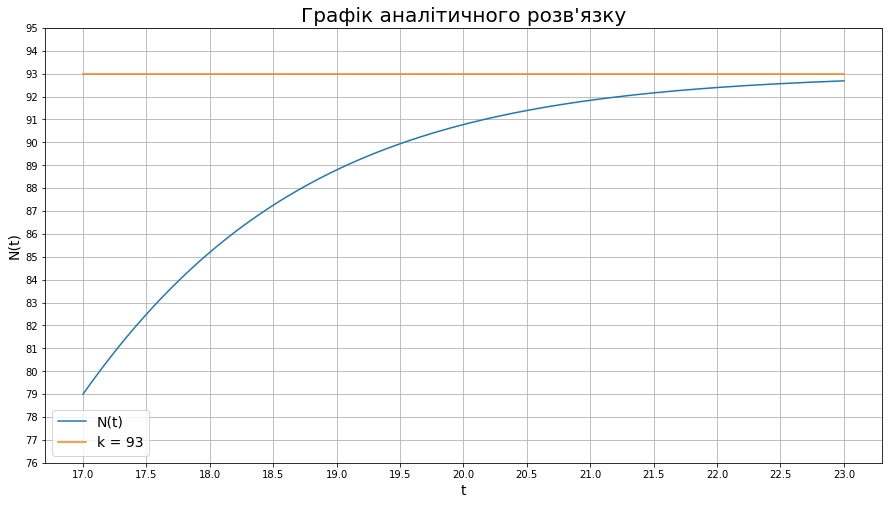

In [15]:
plt.figure(figsize=(15,8))
plt.title("Графік аналітичного розв\'язку", fontsize=20)
plt.plot(time, N_analytical(time), label='N(t)')
plt.plot(time, [k]*time.shape[0], label='k = {}'.format(k))
plt.grid()
plt.xticks(np.arange(t_0, 23.5, 0.5))
plt.yticks(np.arange(76, 96, 1))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Графік чисельного розв'язку

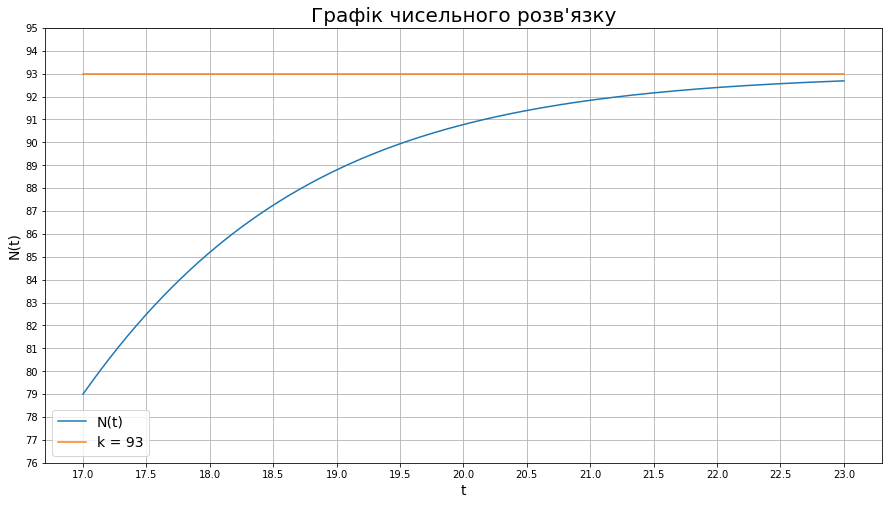

In [16]:
plt.figure(figsize=(15,8))
plt.title("Графік чисельного розв\'язку", fontsize=20)
plt.plot(time, N_numerical, label='N(t)')
plt.plot(time, [k]*time.shape[0], label='k = {}'.format(k))
plt.grid()
plt.xticks(np.arange(t_0, 23.5, 0.5))
plt.yticks(np.arange(76, 96, 1))
plt.xlabel('t', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.legend(fontsize=14)
plt.show()